# Project: Wrangle and Analyze WeRateDogs Data


##### By Babatunde Olaniyi

## Data Gathering

The wrangling process begins by gathering the required data. The only data that I didn't have to obtain elsewhere are the data contained in the file "twitter-archive-enhanced.csv" which was provided to me.

In [85]:
# importing all required libraries
import pandas as pd
import numpy as np
import requests
import os
import glob
from bs4 import BeautifulSoup
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import collections
import functools
from urllib.parse import urlparse


In [25]:
# Downloading WeRateDogs Twitter archive data from a csv file

df_WeRateDog_archive = pd.read_csv('twitter_archive_enhanced.csv')

In [26]:
# Downloading image-predictions.tsv programmatically

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url, allow_redirects=True)
open('image-predictions.tsv', 'wb').write(response.content)
df_predictions = pd.read_csv('image-predictions.tsv', sep='\t')


>A brief note on the code below. This code can be run but since the file containing the api keys isn't included in the project submission for security reasons, the code is presented here for review purposes only. A reviewer is free to try this code using his/her own API keys. 

In [28]:
#Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

consumer_key = ########################################
consumer_secret = ####################################
access_token = #####################################
access_secret = ##################################

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


In [29]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_WeRateDog_archive.tweet_id.values
len(tweet_ids)

# Querying Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

# Saving each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Fail
790: 773985732834758656
Fail
791: 773922284943896577
Fail
792: 773704687002451968
Fail
793: 773670353721753600
Fail
794: 773547596996571136
Fail
795: 773336787167145985
Fail
796: 773308824254029826
Fail
797: 773247561583001600
Fail
798: 773191612633579521
Fail
799: 772877495989305348
Fail
800: 772826264096874500
Fail
801: 772615324260794368
Fail
802: 772581559778025472
Fail
803: 772193107915964416
Fail
804: 772152991789019136
Fail
805: 772117678702071809
Fail
806: 772114945936949249
Fail
807: 772102971039580160
Fail
808: 771908950375665664
Fail
809: 771770456517009408
Fail
810: 771500966810099713
Fail
811: 771380798096281600
Fail
812: 771171053431250945
Fail
813: 771136648247640064
Fail
814: 771102124360998913
Fail
815: 771014301343748096
Fail
816: 771004394259247104
Fail
817: 770787852854652928
Fail
818: 770772759874076672
Fail
819: 770743923962707968
Fail
820: 770655142660169732
Fail
821: 770414278348247044
Fail
822: 770293558247038976
Fail
823: 770093767776997377
Fail
824: 7700

Fail
1097: 736365877722001409
Fail
1098: 736225175608430592
Fail
1099: 736010884653420544
Fail
1100: 735991953473572864
Fail
1101: 735648611367784448
Fail
1102: 735635087207878657
Fail
1103: 735274964362878976
Fail
1104: 735256018284875776
Fail
1105: 735137028879360001
Fail
1106: 734912297295085568
Fail
1107: 734787690684657664
Fail
1108: 734776360183431168
Fail
1109: 734559631394082816
Fail
1110: 733828123016450049
Fail
1111: 733822306246479872
Fail
1112: 733482008106668032
Fail
1113: 733460102733135873
Fail
1114: 733109485275860992
Fail
1115: 732732193018155009
Fail
1116: 732726085725589504
Fail
1117: 732585889486888962
Fail
1118: 732375214819057664
Fail
1119: 732005617171337216
Fail
1120: 731285275100512256
Fail
1121: 731156023742988288
Fail
1122: 730924654643314689
Fail
1123: 730573383004487680
Fail
1124: 730427201120833536
Fail
1125: 730211855403241472
Fail
1126: 730196704625098752
Fail
1127: 729854734790754305
Fail
1128: 729838605770891264
Fail
1129: 729823566028484608
Fail
1130:

Fail
1391: 700151421916807169
Fail
1392: 700143752053182464
Fail
1393: 700062718104104960
Fail
1394: 700029284593901568
Fail
1395: 700002074055016451
Fail
1396: 699801817392291840
Fail
1397: 699788877217865730
Fail
1398: 699779630832685056
Fail
1399: 699775878809702401
Fail
1400: 699691744225525762
Fail
1401: 699446877801091073
Fail
1402: 699434518667751424
Fail
1403: 699423671849451520
Fail
1404: 699413908797464576
Fail
1405: 699370870310113280
Fail
1406: 699323444782047232
Fail
1407: 699088579889332224
Fail
1408: 699079609774645248
Fail
1409: 699072405256409088
Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424:

Fail
1685: 681679526984871937
Fail
1686: 681654059175129088
Fail
1687: 681610798867845120
Fail
1688: 681579835668455424
Fail
1689: 681523177663676416
Fail
1690: 681340665377193984
Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713: 680494726643068929
Fail
1714: 680473011644985345
Fail
1715: 680440374763077632
Fail
1716: 680221482581123072
Fail
1717: 680206703334408192
Fail
1718:

Fail
1968: 673342308415348736
Fail
1969: 673320132811366400
Fail
1970: 673317986296586240
Fail
1971: 673295268553605120
Fail
1972: 673270968295534593
Fail
1973: 673240798075449344
Fail
1974: 673213039743795200
Fail
1975: 673148804208660480
Fail
1976: 672997845381865473
Fail
1977: 672995267319328768
Fail
1978: 672988786805112832
Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987: 672884426393653248
Fail
1988: 672877615439593473
Fail
1989: 672834301050937345
Fail
1990: 672828477930868736
Fail
1991: 672640509974827008
Fail
1992: 672622327801233409
Fail
1993: 672614745925664768
Fail
1994: 672609152938721280
Fail
1995: 672604026190569472
Fail
1996: 672594978741354496
Fail
1997: 672591762242805761
Fail
1998: 672591271085670400
Fail
1999: 672538107540070400
Fail
2000: 672523490734551040
Fail
2001:

Fail
2283: 667211855547486208
Fail
2284: 667200525029539841
Fail
2285: 667192066997374976
Fail
2286: 667188689915760640
Fail
2287: 667182792070062081
Fail
2288: 667177989038297088
Fail
2289: 667176164155375616
Fail
2290: 667174963120574464
Fail
2291: 667171260800061440
Fail
2292: 667165590075940865
Fail
2293: 667160273090932737
Fail
2294: 667152164079423490
Fail
2295: 667138269671505920
Fail
2296: 667119796878725120
Fail
2297: 667090893657276420
Fail
2298: 667073648344346624
Fail
2299: 667070482143944705
Fail
2300: 667065535570550784
Fail
2301: 667062181243039745
Fail
2302: 667044094246576128
Fail
2303: 667012601033924608
Fail
2304: 666996132027977728
Fail
2305: 666983947667116034
Fail
2306: 666837028449972224
Fail
2307: 666835007768551424
Fail
2308: 666826780179869698
Fail
2309: 666817836334096384
Fail
2310: 666804364988780544
Fail
2311: 666786068205871104
Fail
2312: 666781792255496192
Fail
2313: 666776908487630848
Fail
2314: 666739327293083650
Fail
2315: 666701168228331520
Fail
2316:

In [30]:
# Loading the gathered data from the twitter API into a dataframe called 'tweet_data_extra'


tweet_data = []
with open('tweet_json.txt') as data_file:
    for json_obj in data_file:
        tweet_data_sub = collections.OrderedDict()
        tweet_data_all = json.loads(json_obj)

        # Get all of the data we're interested in
        tweet_data_sub['tweet_id'] = tweet_data_all['id']
        tweet_data_sub['retweet_count'] = tweet_data_all['retweet_count']
        tweet_data_sub['favorite_count'] = tweet_data_all['favorite_count']

        # Append it to the data gathering list
        tweet_data.append(tweet_data_sub)

# Create a dataframe from the data
tweet_data_extra = pd.DataFrame(tweet_data)

The data has now been loaded into the following dataframes:
 - `df_WeRateDog_archive`: contains data about the archived WeRateDogs tweets.
 - `tweet_data_extra`: contains additional data about the WeRateDogs tweets gathered from Twitter.
 - `df_predictions`: contains the prediction results of a machine learning algorithm trained on a sample of the images from the tweets in the WeRateDogs archive.

## Assessing Data




In [31]:
# Loading the df_WeRateDog_archive dataframe for visual assessment

df_WeRateDog_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Quality issues

##### `df_WeRateDog_archive` quality issues

I can see an issue in the `source` column. There appear to be HTML tags surrounding the name of the device from which the tweet was made. Looking at the links in the tags, it seems that the tags would direct a user to download the user to the Twitter website to download the version of the app compatible with the device being used. This extra text isn't relevant to the information that I expect from this column which is the device used to send the tweet.

Scrolling around a bit, I can see that in the `name` column there are two issues. The first issue is that missing names are encoded as the string 'None'. This is slightly misleading and a potential source of confusion as some of the pandas methods used to detect missing values will report no missing values if called on this column and other methods used to assess data may give strange results. It would be better to just leave the missing names blank and write code deal with them appropriately later on when displaying this data or performing analyses on it. The second issue is that there appear to be words that are clearly not names in this column.

##### Quality issues summary
 - HTML tags in `source`
 - `name` contains words that are clearly not names
 - Missing data in `name` encoded as the string 'None'

##### `df_WeRateDog_archive` tidiness issues

The four columns in this dataframe indicating the type of dog depicted in the tweets with the following names: `doggo`, `floofer`, `pupper`, and `puppo` are unnecesary. These columns can actually be combined into a single column, `dog_type`, where multiple instances of a dog type, e.g., `doggo` and `puppo`, are expressed as a string with the words separated by commas.

##### Tidiness issues summary
 - One variable, the type of dog (e.g. `puppo`), spread over four columns

In [32]:
# Loading the tweet_data_extra dataframe for visual assessment

tweet_data_extra

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6968,33686
1,892177421306343426,5272,29220
2,891815181378084864,3464,21968
3,891689557279858688,7190,36774
4,891327558926688256,7712,35169
...,...,...,...
662,788412144018661376,4905,14660
663,788178268662984705,1966,6870
664,788150585577050112,1196,5779
665,788070120937619456,3200,0


##### `tweet_data_extra` quality issues

It would appear that there is no invalid data in either the `retweet_count` or `favorite_count` columns. There also doesn't appear to be any missing data in either of the aforementioned columns although in this case missing data would simply indicate a that a particular tweet was not retweeted or liked by other users as stated in the official Twitter documentation on tweet objects. Additionally, there don't seem to be any malformed or missing tweet IDs.

##### `tweet_data_extra` tidiness issues

Since this data is meant to augment the archived tweet data it would be prudent to add the `retweet_count` and `favorite_count` columns to the `tweet_data_archived`

##### Tidiness issues summary
 - `retweet_count` and `favorite_count` should be part of `df_WeRateDog_archive`

In [33]:
# Display the image prediction results dataframe

df_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


##### `df_predictions` quality issues

I was observed that the predictions in the columns `p1`, `p2`, and `p3` contain underscores between each of the words that make up the name of the predicted item or dog breed. This is may not have been a problem during the training of the machine learning algorithm but for the purposes of displaying these predictions in an easy to read form it would be best to remove the underscores.

##### Quality issues summary
 - Words combined using underscore in `p1`, `p2`, and `p3`
 
##### `df_predictions` tidiness issues

Since the `p*_dog` columns give information as to which predictions were correct, it would be beneficical to combine these correct predictions with the `df_WeRateDog_archive` dataset. This would make it easier to identify the dog breed displayed in each tweet without having to resort to downloading the pictures from each tweet and performing the identification myself.

##### Tidiness issues summary
 - Correct predictions should be combined with `df_WeRateDog_archive`

### Programmatic assessment

#### Dataframe structure

In [34]:
# Checking the structure of the twitter archive dataframe
df_WeRateDog_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

##### `df_WeRateDog_archive` quality issues 

it's obvious that the datatypes that pandas inferred for several of the columns are incorrect. Since IDs are used primarily to differentiate objects from each other, it would be better if all of the ID columns in this dataframe were converted to strings instead of integers or floats. That way I don't inadvertently perform any sort of mathematical operation on them. The `timestamp` and `retweeted_status_timestamp` columns have erroneously been given the object datatype instead of the datetime datatype.

There are non-null values in all of the `retweeted*` columns. Since one of the requirements of this project is for there to be no retweets in the archived tweet data the rows containing these values will need to be removed. It also would appear that there is missing data in the columns dealing with replies made by the WeRateDogs account (`in_reply*`). Here, the missing data is simply due to the nature of the Twitter platform. Any missing data in these columns is due to the fact that these tweets made by the WeRateDogs account aren't replies to another user's tweet. For these reasons, the missing data wont be reported as quality issues.

##### Quality issues summary
 - Erroneous datatypes (`*_id`, `*timestamp`)
 - `df_WeRateDog_archive` contains retweets

In [35]:
# Checking the structure of the supplementary data dataframe
tweet_data_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        667 non-null    int64
 1   retweet_count   667 non-null    int64
 2   favorite_count  667 non-null    int64
dtypes: int64(3)
memory usage: 15.8 KB


Comparing the number of entries in this dataframe to the number of entries in the `df_WeRateDog_archive` dataframe, there would appear to be missing data. The most likely cause is that, at the time the data was extracted, some of the tweets in the archive have since been deleted. There is really nothing I can do to retrieve the data and I feel that using some other method of making up for the lost data isn't really necessary considering the amount of missing data is very small relative to the total number of tweets contained in the archive. Thus, I won't be including the missing data as a quality issue. Besides the missing data, the only other noticable issue is the incorrect datatype inferred for the `tweet_id` column.

##### Quality issues summary
 - Erroneous datatype for `tweet_id` colum

In [36]:
# Checking for the structure of the image prediction results dataframe
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


##### `df_predictions` quality issues

Not all the columns appear to be of the correct datatype. `tweet_id` appears to be of integer type rather strings type. The  dataframe also has some missing data. If I compare the number of entries in this dataframe to the number of entries in the `df_WeRateDog_archive` dataframe there is a disparity that indicates missing data. Due to the nature of training machine learning algorithms, it's likely that a sample of tweets from the archive was used rather than the entire archive. As with the missing data in the `tweet_data_extra` dataframe, there is really nothing I can do about the missing data. However, the sample appears to be large enough for patterns to emerge and for use in statistical analyses. For this reason I will not be including the missing data as a quality issue

##### Quality issues summary
 - Erroneous datatype for `tweet_id` column





#### Duplicate data

Here I check for duplicate data. I'm mostly concerned with duplicate rows as well as duplicate tweet IDs

In [37]:
# Check for duplicate rows and tweet ids in each dataframe
dataframes = [df_WeRateDog_archive, tweet_data_extra, df_predictions]
dataframe_names = ['df_WeRateDog_archive', 'tweet_data_extra', 'df_predictions']

for df_name, df in zip(dataframe_names, dataframes):
    dataframe_dup_rows = df.duplicated().sum()
    dataframe_dup_ids = df.duplicated('tweet_id').sum()
    
    print(df_name)
    print('-' * len(df_name) + '\n')
    print('Number of duplicate rows: {}'. format(dataframe_dup_rows))
    print('Number of duplicate tweet IDs: {}\n'.format(dataframe_dup_ids))

df_WeRateDog_archive
--------------------

Number of duplicate rows: 0
Number of duplicate tweet IDs: 0

tweet_data_extra
----------------

Number of duplicate rows: 0
Number of duplicate tweet IDs: 0

df_predictions
--------------

Number of duplicate rows: 0
Number of duplicate tweet IDs: 0



`OBSERVATION`


There are no  duplicated rows or tweet IDs in the `df_WeRateDog_archive`, `tweet_data_extra`, or `df_predictions` dataframes.

#### Invalid or inaccurate data

Checking for invalid or inaccurate data by first computing basic stats on the columns in each dataframe for which it makes sense to do so.

In [38]:
# Compute basic stats on rating_numerator and rating_denominator columns in df_WeRateDog_archive
df_WeRateDog_archive[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


##### `df_WeRateDog_archive` quality issues

Some extremely large values are observed in the `df_WeRateDog_archive` dataframe according to the WeRateDogs rating system. Therefore, there is need to examine this in greater detail to point out the minimum value of 0 in the `rating_denominator` column. This is an invalid value according to the schema of the _**WeRateDogs**_ data.

In [39]:
# Get of tweet with rating_denominator value of 0
invalid_tweet_text = df_WeRateDog_archive.loc[df_WeRateDog_archive.rating_denominator == 0, 'text'].tolist()[0]
print(invalid_tweet_text)

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho


`OBSERVATION`


The text of the tweet above reveals that the _**WeRateDogs**_ account has provided an alternative rating that is both valid and in line with the rating system. Based on this tweet, there are likely to be more errors like this one where there are two ratings given in the tweet and the method used to extract the numerator and denominator of the ratings only does so for the first rating. In these cases determining the correct rating may not be as clear cut as the tweet shown here.

Continuing my exploration of the ratings columns, I'll take a random sample of entries from the `text` column to see whether or not this is a common occurrence.

In [40]:
# Get a random sample of 25 entries from the text column
text_sample = df_WeRateDog_archive.sample(25, random_state=12).text
text_sample_size = text_sample.size - 1
for i, entry in enumerate(text_sample):
    print(entry)
    if i != text_sample_size:
        print('----------')

This is CeCe. She's patiently waiting for Santa. 10/10 https://t.co/ZJUypFFwvg
----------
This is Beemo. He's a Chubberflop mix. 12/10 would cross the world for https://t.co/kzMVMU8HBV
----------
Touching scene here. Really stirs up the emotions. The bond between father &amp; son. So beautiful. 10/10 for both pups https://t.co/AJWJHov5gx
----------
This is Dave. He's currently in a predicament. Doesn't seem to mind tho. 12/10 someone assist Dave https://t.co/nfprKAXqwu
----------
This is Toby. A cat got his tongue. 13/10 adorable af https://t.co/fHQrBKYSLC
----------
This is Buddy. He's photogenic af. Loves to sexily exit pond. Very striped. Comes with shield. 8/10 would pet well https://t.co/mYhQvAdV4f
----------
This is Bo. He's going to make me cry. 13/10 please get off the bus for him Carly https://t.co/U7FvBZo6Bq
----------
RT @dog_rates: Please only send in dogs. We only rate dogs, not seemingly heartbroken ewoks. Thank you... still 10/10 would console https:/…
----------
Here we

Judging from this sample, it looks like these extremely large numerator and denominator values are likely to be quite rare. I can verify this by getting frequency counts of all of the values contained in both the `rating_numerator` and `rating_denominator` columns. Furthermore, the url links are not needed because intend do a word cloud of the 'text' column

In [41]:
# Checking value counts of rating_numerator column
df_WeRateDog_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

The value counts show that extremely large values in the `rating_numerator` and `rating_denominator` columns are indeed rare which supports what was observed from the sample. Looking at the sample again, there is an entry that simply states that the account _**docmisterio**_ was created on 11/15/15.

In [42]:
# checking ratings corresponding to entry containing date
text_sample_mask = text_sample.str.contains('account')
junk_tweet_id = text_sample[text_sample_mask].index[0]
df_WeRateDog_archive.iloc[junk_tweet_id][['rating_numerator', 'rating_denominator']]

rating_numerator      11
rating_denominator    15
Name: 342, dtype: object

The ratings associated with this tweet seem to have come from the first two numbers of the date contained in the tweet. This is another indication that the method used to extract the ratings from the text of the tweets was rather basic and didn't take cases like the presence of dates or  multiple scores into account. It's likely that there are more errors like this in the `df_WeRateDog_archive` dataframe.

In [43]:
# Checking for the entire row of tweet containing junk data
df_WeRateDog_archive.iloc[junk_tweet_id]

tweet_id                                                     832088576586297345
in_reply_to_status_id                                      832087547559997440.0
in_reply_to_user_id                                                  30582082.0
timestamp                                             2017-02-16 04:45:50 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                                   @docmisterio account started on 11/15/15
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                                                               NaN
rating_numerator                                                             11
rating_denominator                                                           15
name                                    

This shows that this tweet doesn't actually contain any useful data and is essentially a "junk tweet" which can safely be removed from the `df_WeRateDog_archive` dataframe along with other occurrences that may b encountered.

##### Quality issues summary
 - Some values in `rating_numerator` and `rating_denominator` taken from dates or, in the case of multiple scores, the wrong score
 - Single instance of 0 in `rating_denominator`
 - Some tweets don't contain useful data

In [44]:
# Checking for basic stats on retweet_count and favorite_count columns in tweet_data_extra
tweet_data_extra[['retweet_count', 'favorite_count']].describe()

,retweet_count,favorite_count
count,667.000000,667.000000
mean,4632.128936,14469.157421
std,5208.427399,14696.189743
min,1.000000,0.000000
25%,1980.500000,6041.500000
50%,3150.000000,11503.000000
75%,5245.000000,19804.500000
max,51398.000000,123638.000000


##### `tweet_data_extra` quality issues

Based on the basic statistics computed for the the `retweet_count` and `favorite_count` columns there don't appear to be any invalid values. Even the very large maximum values fit within the schema of the _**WeRateDogs**_ data as, at the time the tweets were made, the _**WeRateDogs**_ account had around 7.28 million followers and the upper limit for retweet and favorite counts for each tweet are likely the same as the one imposed for the integer datatype in the database used by Twitter which, for most databases, is quite large even for signed integers.

In [45]:
# Checking for basic stats on the p*_conf columns of df_predictions
df_predictions[['img_num', 'p1_conf', 'p2_conf', 'p3_conf']].describe()

,img_num,p1_conf,p2_conf,p3_conf
count,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,1.203855,0.594548,1.345886e-01,6.032417e-02
std,0.561875,0.271174,1.006657e-01,5.090593e-02
min,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,1.000000,0.843855,1.955655e-01,9.180755e-02
max,4.000000,1.000000,4.880140e-01,2.734190e-01


##### `df_predictions` quality issues

It would seem that there is no invalid data in any of the prediction confidence columns. All of the quartiles, the minimum, and the maximum values for each column fall squarely within the interval ${[0, 1]}$. This is in line with my expectations given that the values in these columns are probabilities. The `img_num` column appears to contain valid data as well as it can be seen from the minumum value that there are no negative numbers.

In [46]:
# Check for strange characters and explicit 'None', 'NA', or 'N/A' encodings in the predicitons columns
# of df_predictions
for col in ['p1', 'p2', 'p3']:
    match_mask = df_predictions[col].str.match('(.*[^\'\w-].*|n(?:/?a|one)$)', case=False)
    matches = df_predictions[col].loc[match_mask]
    if matches.empty:
        print('There were no matches for column \'{}\''.format(col))
    else:
        print('There were matches for column \'{}\''.format(col))

There were no matches for column 'p1'
There were no matches for column 'p2'
There were no matches for column 'p3'


There doesn't appear to be any characters that aren't letters, underscores, hyphens, or apostrophes in any of the prediction columns. There also aren't any explicitly encoded 'None', 'NA', or 'N/A' strings like there were in the `name` column of the `df_WeRateDog_archive` dataframe.

### Summary of quality and tidiness issues

All of the quality and tidiness issues that were found in the `df_WeRateDog_archive`, `tweet_data_extra`, and `df_predictions` dataframes.

#### Quality

##### `df_WeRateDog_archive`
 - HTML tags in `source`
 - `name` contains words that are clearly not names
 - Missing data in `name` encoded as the string 'None'
 - Erroneous datatypes (`*_id`, `*timestamp`)
 - `df_WeRateDog_archive` contains retweets
 - Some values in `rating_numerator` and `rating_denominator` taken from dates or, in the case of multiple scores, the wrong score
 - Single instance of 0 in `rating_denominator`
 - Some tweets don't contain useful data
 
##### `tweet_data_extra`
 - Erroneous datatype for `tweet_id` column

##### `df_predictions`
 - Erroneous datatypes (`tweet_id`)
 - Words combined using underscore in `p1`, `p2`, and `p3`

#### Tidiness

##### `df_WeRateDog_archive`
 - One variable, the type of dog (e.g. `puppo`), spread over four columns

##### `tweet_data_extra`
 - `retweet_count` and `favorite_count` should be part of `df_WeRateDog_archive`
 
##### `df_predictions`
 - Correct predictions should be combined with `df_WeRateDog_archive`

## Cleaning Data


In [47]:
# Creating copies of the df_WeRateDog_archive, tweet_data_extra and df_predictions dataframes
df_WeRateDog_archive_clean = df_WeRateDog_archive.copy()
tweet_data_extra_clean = tweet_data_extra.copy()
df_predictions_clean = df_predictions.copy()


### Issue #1: Junk data

#### `df_WeRateDog_archive`: some tweets don't contain useful data

##### Define:

Remove all rows that contain a string in the `text` column with the form `@user account started on MM/DD/YY` and reset the index of `df_WeRateDog_archive`

##### Code:

In [48]:
junk_data_mask = df_WeRateDog_archive_clean.text.str.match('@.*account started.*\d{2}/\d{2}/\d{2}')
df_WeRateDog_archive_clean = df_WeRateDog_archive_clean[~junk_data_mask]
df_WeRateDog_archive_clean.reset_index(drop=True, inplace=True)

##### Test:

In [49]:
clean_data_mask = df_WeRateDog_archive_clean.text.str.match('@.*account started.*\d{2}/\d{2}/\d{2}')
clean_data_matches = df_WeRateDog_archive_clean.text.loc[clean_data_mask]
print('Number of rows matching the regex: {}'.format(clean_data_matches.sum()))

Number of rows matching the regex: 0


### Issue #2:

#### Tidiness

#### `df_WeRateDog_archive`: one of the variables which describes dog type (e.g. `puppo`) is spread over four columns

##### Define:

Combine the `doggo`, `floofer`, `pupper`, and `puppo` columns into a single column called `dog_type` before dropping them. All 'None' strings will be converted to NaNs.

##### Code:

In [50]:
# Replacing None strings with empty strings
dog_type_cols = ['doggo', 'floofer', 'pupper', 'puppo']
df_WeRateDog_archive_clean[dog_type_cols] = df_WeRateDog_archive_clean[dog_type_cols].replace('None', '')

# Combining columns and convert empty strings to NaN
dog_type_col_data = [df_WeRateDog_archive_clean[col] for col in dog_type_cols]
df_WeRateDog_archive_clean['dog_type'] = functools.reduce(lambda col_main, col_add: col_main.str.cat(col_add, ', '), dog_type_col_data)
df_WeRateDog_archive_clean['dog_type'] = df_WeRateDog_archive_clean['dog_type'].str.strip(', ')
df_WeRateDog_archive_clean['dog_type'] = df_WeRateDog_archive_clean['dog_type'].apply(lambda x: x.replace(', ', '', x.count(',')-1))
df_WeRateDog_archive_clean['dog_type'] = df_WeRateDog_archive_clean['dog_type'].replace('', np.nan)

# Drop columns
df_WeRateDog_archive_clean = df_WeRateDog_archive_clean.drop(columns=dog_type_cols)

#### Test:

In [51]:
# Check columns and datatype
df_WeRateDog_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2355 entries, 0 to 2354
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2355 non-null   int64  
 1   in_reply_to_status_id       77 non-null     float64
 2   in_reply_to_user_id         77 non-null     float64
 3   timestamp                   2355 non-null   object 
 4   source                      2355 non-null   object 
 5   text                        2355 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2355 non-null   int64  
 11  rating_denominator          2355 non-null   int64  
 12  name                        2355 non-null   object 
 13  dog_type                    380 n

In [52]:
# Checking to see that dog_type column contains correct values
df_WeRateDog_archive_clean.dog_type.value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_type, dtype: int64

### Issue #3:
#### `tweet_data_extra`: `retweet_count` and `favorite_count` should be part of `tweet_data_archived`

##### Define:

Merge `df_WeRateDog_archive` and `tweet_data_extra` on `tweet_id` column.

##### Code:

In [53]:
df_WeRateDog_archive_clean = pd.merge(df_WeRateDog_archive_clean,
                                     tweet_data_extra_clean,
                                     how='left',
                                     on='tweet_id')

#### Test

In [54]:
df_WeRateDog_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,6968.0,33686.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,5272.0,29220.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,3464.0,21968.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,7190.0,36774.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,7712.0,35169.0


### Issue #4:
`df_predictions`: correct predictions should be combined with `df_WeRateDog_archive`

##### Define:

Extract the correct predictions from each prediction variable in such a way as to prefer the first prediction and combine these predictions with `df_WeRateDog_archive`.

##### Code:

In [55]:
# Extract all of the correct predictions
image_pred_cols = df_predictions_clean.columns.tolist()
pred_col_pairs = [[image_pred_cols[i], image_pred_cols[i+2]] for i in
                  range(3, len(image_pred_cols), 3)]

dog_breeds_partial = []
for pred_col_pair in pred_col_pairs:
    p, p_dog = pred_col_pair
    tmp_pred = df_predictions_clean.loc[df_predictions[p_dog] == True, ['tweet_id', p]]                                                        
    dog_breeds_partial.append(tmp_pred.rename(columns={p: 'dog_breed'}))
dog_breeds = pd.concat(dog_breeds_partial, ignore_index=True, sort=True)

# Combine correct predictions with tweet_data_archived
dog_breeds.drop_duplicates('tweet_id', inplace=True)
df_WeRateDog_archive_clean = pd.merge(df_WeRateDog_archive_clean, dog_breeds, on='tweet_id', how='left')

##### Test:

In [56]:
df_WeRateDog_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count,dog_breed
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,6968.0,33686.0,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,5272.0,29220.0,Chihuahua
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,3464.0,21968.0,Chihuahua
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,7190.0,36774.0,Labrador_retriever
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,7712.0,35169.0,basset


### Issue #5:

#### `df_WeRateDog_archive_clean`: erroneous datatypes (`*_id`, `*timestamp`)

##### Define:

Convert each of the ID columns into strings and convert the timestamp columns into datetime.

##### Code:

In [57]:
id_col_names = [t_id for t_id in df_WeRateDog_archive_clean.columns.tolist() if 'id' in t_id]
for id_col_name in id_col_names:
    if df_WeRateDog_archive_clean[id_col_name].dtype == 'float64':
        df_WeRateDog_archive_clean[id_col_name] = df_WeRateDog_archive_clean[id_col_name].fillna(0)
        df_WeRateDog_archive_clean[id_col_name] = df_WeRateDog_archive_clean[id_col_name].astype(int)
    df_WeRateDog_archive_clean[id_col_name] = df_WeRateDog_archive_clean[id_col_name].astype(str)
    df_WeRateDog_archive_clean[id_col_name] = df_WeRateDog_archive_clean[id_col_name].replace('0', np.nan)

# Change timestamp columns to datetime
ts_col_names = [t_ts for t_ts in df_WeRateDog_archive_clean.columns.tolist() if 'timestamp' in t_ts]
for ts_col_name in ts_col_names:
    df_WeRateDog_archive_clean[ts_col_name] = pd.to_datetime(df_WeRateDog_archive_clean[ts_col_name])

##### Test:

In [58]:
df_WeRateDog_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 0 to 2354
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2355 non-null   object             
 1   in_reply_to_status_id       77 non-null     object             
 2   in_reply_to_user_id         77 non-null     object             
 3   timestamp                   2355 non-null   datetime64[ns, UTC]
 4   source                      2355 non-null   object             
 5   text                        2355 non-null   object             
 6   retweeted_status_id         181 non-null    object             
 7   retweeted_status_user_id    181 non-null    object             
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2355 non-null   int64           

### Issue #6:
`df_WeRateDog_archive_clean` contains retweets

##### Define:

Remove all rows where `retweeted_status_id`. This will also take care of `retweeted_status_user_id` and `retweeted_status_timestamp` as both of these columns have values in the same rows as `retweeted_status_id`. Afterwards, reset the index.

##### Code:

In [59]:
retweeted_cols = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
retweeted_mask = df_WeRateDog_archive_clean.retweeted_status_id.notnull()

df_WeRateDog_archive_clean = df_WeRateDog_archive_clean[~retweeted_mask]
df_WeRateDog_archive_retweet_test = df_WeRateDog_archive_clean.copy() # For testing
df_WeRateDog_archive_clean.drop(columns=retweeted_cols, inplace=True)
df_WeRateDog_archive_clean.reset_index(drop=True, inplace=True)

##### Test:

In [60]:
# Checking to make sure we deleted all of the retweets
df_WeRateDog_archive_retweet_test.retweeted_status_id.notnull().sum()

0

In [61]:
# Checking to make sure we removed all of the retweet columns
df_WeRateDog_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count,dog_breed
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,6968.0,33686.0,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,5272.0,29220.0,Chihuahua
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,3464.0,21968.0,Chihuahua
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,7190.0,36774.0,Labrador_retriever
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,7712.0,35169.0,basset


### Issue #7: 
#### `df_WeRateDog_archive_clean`: missing data in `name` encoded as the string 'None'

##### Define:

Replace all instances of the string 'None' with NaN.



##### Code:

In [62]:
df_WeRateDog_archive_clean.name = df_WeRateDog_archive_clean.name.replace('None', np.nan)

##### Test:

In [63]:
df_WeRateDog_archive_clean.name.loc[df_WeRateDog_archive_clean.name == 'None'].sum()

0

### Issue #8: 
#### `df_WeRateDog_archive_clean`: HTML tags in `source` column

##### Define:

Extract the name of the source platform from the HTML tags and replace the original values of the `source` column with them.

##### Code:

In [64]:
platform_names = (df_WeRateDog_archive_clean.source.str.extract('>(.*?)<')
                  .rename(columns={0: 'platform_name'}))
df_WeRateDog_archive_clean['source'] = platform_names

#### Test:

In [65]:
df_WeRateDog_archive_clean.source.value_counts()

Twitter for iPhone     2041
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #9:
#### `df_WeRateDog_archive_clean`: Some values in `rating_numerator` and `rating_denominator` taken from dates or, in the case of multiple scores, the wrong score.

##### Define:

Find tweets with dates and multiple scores. For the tweets with dates, look for scores surrounding the dates and extract them. For the tweets with multiple scores, extract the first one but be mindful of the presence of numbers with decimal points in the numerator.

##### Code:

In [66]:
# Look for dates
date_chk_pattern = '\d{1,2}/\d{1,2}/\d{1,2}'
date_ext_pattern_front = '(\d{1,3}(?:\.\d{1,3})?)/(\d{1,3}).*?' + date_chk_pattern
date_ext_pattern_back = date_chk_pattern + '.*?(\d{1,3}(?:\.\d{1,3})?)/(\d{1,3})'

# Performing this check since the junk tweets removed previously may have been the only
# rows with a date in the text column
col_names = ['rating_numerator', 'rating_denominator']
new_col_names = {0: 'rating_numerator', 1: 'rating_denominator'}
if df_WeRateDog_archive_clean.text.str.contains(date_chk_pattern).sum():
    # Extract scores
    front_scores = (df_WeRateDog_archive_clean.text.str.extract(date_ext_pattern_front)
                    .rename(columns=new_col_names))
    back_scores = (df_WeRateDog_archive_clean.text.str.extract(date_ext_pattern_back)
                   .rename(columns=new_col_names))
    
    # Get masks
    front_score_mask = front_score.rating_numerator.notnull()
    back_score_mask = back_score.rating_numerator.notnull()
    
    # Assign to tweet_data_archived
    df_WeRateDog_archive_clean.loc[front_score_mask, col_names] = (front_scores
                                                                  .loc[front_scores_mask])
    df_WeRateDog_archive_clean.loc[back_score_mask, col_names] = (back_scores
                                                                 .loc[back_scores_mask])
    print('Fixed issue of extracting dates instead of score.')
else:
    print('No dates.')

# Extract first score in tweets where there are multiple scores
mult_score_ext = '(\d{1,3}(?:\.\d{1,3})?)/(\d{1,3})'

mult_scores = (df_WeRateDog_archive_clean.text.str.extract(mult_score_ext)
               .rename(columns=new_col_names))
mult_scores_mask = mult_scores.rating_numerator.notnull()
df_WeRateDog_archive_clean.loc[mult_scores_mask, col_names] = mult_scores.loc[mult_scores_mask]

print('\nFixed issue of extracting the wrong score.')

No dates.

Fixed issue of extracting the wrong score.


#### Test:

In [67]:
# Testing only for multiple scores since there were no date matches
if df_WeRateDog_archive_clean.loc[mult_scores_mask, col_names].equals(mult_scores
                                                                     .loc[mult_scores_mask]):
    print('Cleaning issue multiple scores successful')
else:
    print('Something went wrong')

Cleaning issue multiple scores successful


### Issue #10:
#### `df_WeRateDog_archive_clean`:  single instance of 0 in `rating_denominator`

##### Define:

Replace the score with the 0 in the denominator with the alternative score provided in the text of the tweet.

##### Code:

In [68]:
ratings_cols = ['rating_numerator', 'rating_denominator']
new_ratings_names = {i: rating for i, rating in enumerate(ratings_cols)}
zero_denom_mask = df_WeRateDog_archive_clean.text.str.contains('/00')
new_ratings = df_WeRateDog_archive_clean.text.loc[zero_denom_mask].str.extract('/00.*?(\d{1,3})/(\d{1,3})')
df_WeRateDog_archive_clean.loc[zero_denom_mask, ratings_cols] = new_ratings.rename(columns=new_ratings_names)

#### Test:

In [69]:
df_WeRateDog_archive_clean.loc[zero_denom_mask, ratings_cols]

,rating_numerator,rating_denominator
263,13,10


### Issue 11:
##### `df_WeRateDog_archive_clean`: erroneous datatype for `tweet_id` column

##### Define:

Change datatype of `tweet_id` column to string.

##### Code:

In [70]:
df_predictions_clean['tweet_id'] = df_predictions_clean['tweet_id'].astype(str)

#### Test:

In [71]:
assert df_predictions_clean.tweet_id.dtype == 'O', "'tweet_id' is not of type 'object'"

### Issue #12:
#### Words in `df_predictions` combined using underscore in `p*` columns. Also the case in `df_WeRateDog_archive` with the `dog_breed` column.

##### Define:

Replace the underscore separating the words in each of the `p*` columns in `df_predictions_clean` as well as the `dog_breed` column in `df_WeRateDog_archive`.

##### Code:

In [72]:
# Remove underscores in the p* columns of df_predictions
p_cols = [p_col for p_col in df_predictions.columns.tolist() if
          'p' in p_col and '_' not in p_col]
for p_col in p_cols:
    df_predictions_clean[p_col] = df_predictions_clean[p_col].str.replace('_', ' ')
    
# Remove underscores in dog_breed column of df_WeRateDog_archive
df_WeRateDog_archive_clean['dog_breed'] = df_WeRateDog_archive_clean['dog_breed'].str.replace('_', ' ')

#### Test:

In [73]:
# Checking df_predictions
df_predictions_clean[p_cols].head(10)

,p1,p2,p3
0,Welsh springer spaniel,collie,Shetland sheepdog
1,redbone,miniature pinscher,Rhodesian ridgeback
2,German shepherd,malinois,bloodhound
3,Rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,Rottweiler,Doberman
5,Bernese mountain dog,English springer,Greater Swiss Mountain dog
6,box turtle,mud turtle,terrapin
7,chow,Tibetan mastiff,fur coat
8,shopping cart,shopping basket,golden retriever
9,miniature poodle,komondor,soft-coated wheaten terrier


In [74]:
# Checking df_WeRateDog_archive_clean
df_WeRateDog_archive_clean['dog_breed'].head(10)

0                         NaN
1                   Chihuahua
2                   Chihuahua
3          Labrador retriever
4                      basset
5    Chesapeake Bay retriever
6                 Appenzeller
7                  Pomeranian
8               Irish terrier
9                    Pembroke
Name: dog_breed, dtype: object

### Issue #13:
url present in the 'text' column

#### Define:
Remove all the urls from the tweets in the 'text' column

#### Code:

In [88]:
# Remove url links from the 'text' column

def is_url(url):
  try:
    result = urlparse(url)
    return all([result.scheme, result.netloc])
  except ValueError:
    return False

df_WeRateDog_archive_clean['text'] = [' '.join(y for y in x.split() if not is_url(y)) for x in df_WeRateDog_archive_clean['text']]


In [91]:
#### Test:

In [90]:
# Checking random sample of 25 entries from the text column 
text_sample = df_WeRateDog_archive_clean.sample(25, random_state=12).text
text_sample_size = text_sample.size - 1
for i, entry in enumerate(text_sample):
    print(entry)
    if i != text_sample_size:
        print('----------')

This is Tuco. That's the toast that killed his father. 9/10
----------
Was just informed about this hero pupper and others like her. Another 14/10, would be an absolute honor to pet
----------
We don't rate penguins, but if we did, this one would get 12/10
----------
Here we are witnessing an isolated squad of bouncing doggos. Unbelievably rare for this time of year. 11/10 for all
----------
Say hello to mad pupper. You know what you did. 13/10 would pet until no longer furustrated
----------
This is Alfie. He's touching a butt. Couldn't be happier. 11/10
----------
This is Shelby. She finds stuff to put on her head for attention. It works really well. 12/10 talented af
----------
After getting lost in Reese's eyes for several minutes we're going to upgrade him to a 13/10
----------
This is Sunny. She was also a very good First Doggo. 14/10 would also be an absolute honor to pet
----------
This is Olaf. He's gotta be rare. Seems sturdy. Tail is floofy af. 12/10 would do whatever it tak

## Storing Data
Saving the  gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [92]:
twitter_archive_master = df_WeRateDog_archive_clean.copy()

out_file = 'twitter-archive-master.csv'
twitter_archive_master.to_csv(out_file, index=False)

## Analyzing and Visualizing Data
Analyzing and visualizing the wrangled data to generate insights and visualizations.

In [93]:
# Importing required libraries

import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings
from wordcloud import WordCloud

# Enable inline plotting, use seaborn styling on plots, and ignore matplotlib and seaborn warnings
%matplotlib inline
sns.set()
warnings.filterwarnings('ignore')

### Insights:


#### 1. Most common dog breeds

Checking for the most common dog breeds

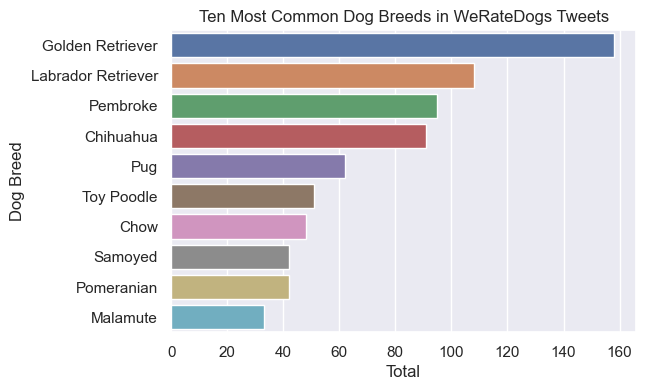

In [94]:
# Plotting counts of the 10 most common dog breeds
top_breeds = (twitter_archive_master.dog_breed.value_counts()
              .head(10)
              .to_frame()
              .reset_index()
              .rename(columns={'index': 'dog_breed', 'dog_breed': 'total'}))
top_breeds['dog_breed'] = top_breeds['dog_breed'].str.title()
plt.figure(dpi=100);
ax = sns.barplot(x='total', y='dog_breed', data=top_breeds);
ax.set_title('Ten Most Common Dog Breeds in WeRateDogs Tweets');
ax.set_ylabel('Dog Breed');
ax.set_xlabel('Total');

From the plot it's clear that the Golden Retriever shows up the most often in tweets even compared to the rest of the most common dog breeds. The second most common breed, the Labrador Retriever, doesn't appear nearly as often as the Golden Retriever despite its own fairly high frequency of appearances. It's possible that the majority of the _**WeRateDogs**_ account's followers own Golden Retrievers or that they are more active than followers who own other dogs but I can't be too certain of this without conducting some sort of survey. If I assume that the followers of the _**WeRateDogs**_ account are representative of dog owners as a whole then, given the account's massive following, this could be an indication of the popularity of all of the breeds represented in the image prediction data.

#### 2. Most common dog type

Checking to see which of the dog labels or types (e.g., doggo, puppo, etc.) is the most common.


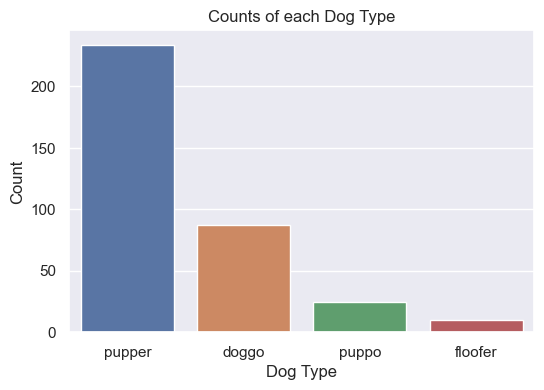

In [95]:
# Extract separate dog types
dog_type_mask = twitter_archive_master['dog_type'].notnull()
dog_type_raw = twitter_archive_master.dog_type.loc[dog_type_mask].str.split(',').tolist()
dog_type = list(map(lambda x: x.strip(), itertools.chain.from_iterable(dog_type_raw)))
dog_type = np.array(dog_type)

# Plot counts of each dog type
plot_category_order = ['pupper', 'doggo', 'puppo', 'floofer']
plt.figure(dpi=100);
ax = sns.countplot(x=dog_type, order=plot_category_order);
ax.set_title('Counts of each Dog Type');
ax.set_ylabel('Count');
ax.set_xlabel('Dog Type');

From the bar chart it appears that the majority of the dogs displayed in the tweets are puppies. 

#### 3. Most common scores

Checking for the most common scores given to the dogs shown in each tweet.

In [96]:
twitter_archive_master['score'] = twitter_archive_master['rating_numerator'].astype(str) + "/" + \
                                  twitter_archive_master['rating_denominator'].astype(str)
twitter_archive_master.score.value_counts()

12/10       500
10/10       442
11/10       425
13/10       308
9/10        155
8/10         98
7/10         52
14/10        43
5/10         34
6/10         32
3/10         19
4/10         15
2/10          9
1/10          7
0/10          2
4/20          2
420/10        2
11.26/10      1
9.5/10        1
20/16         1
7/11          1
99/90         1
121/110       1
143/130       1
144/120       1
44/40         1
60/50         1
45/50         1
88/80         1
80/80         1
50/50         1
007/10        1
204/170       1
9/11          1
776/10        1
165/150       1
13.5/10       1
17/10         1
666/10        1
182/10        1
11.27/10      1
15/10         1
9.75/10       1
24/7          1
84/70         1
1/2           1
Name: score, dtype: int64

The most common score by far is 12/10 followed by 10/10 and 11/10. It's interesting to note that in these "standard" scores the numerator doesn't stray too far above the numerator. The sillier, more outlandish scores appear to be quite rare even compared to the scores where the numerator is less than the denominator. This suggests that, on the whole, _**WeRateDogs**_ regards the dogs whose pictures have been submitted to them as being worthy of praise and adulation and that the account is quite lenient in the scores it gives them

#### 4. Total tweets per month

I'll briefly examine the overall posting behavior of the _**WeRateDogs**_ account beginning with how often the owners of the account posted a tweet each month over the almost two years the account had been active at the time the archived tweets were collected.

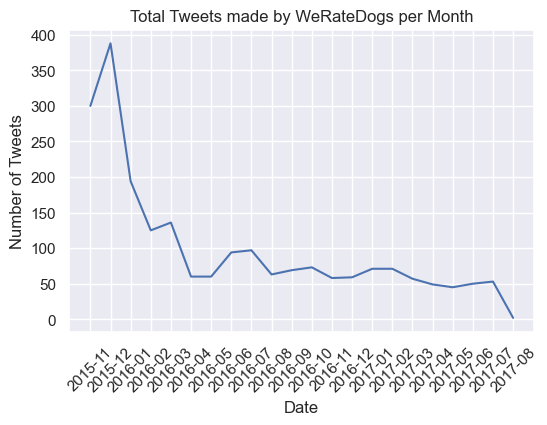

In [97]:
# Prepare tweet_archive for plotting
twitter_archive_master['year_month_date'] = twitter_archive_master['timestamp'].dt.year.astype(str) + '-' + \
                                            twitter_archive_master['timestamp'].dt.month.astype(str).str.pad(2, fillchar='0')
twitter_archive_master['is_tweet'] = np.where(twitter_archive_master.tweet_id.notnull(), 1, 0)

# Get required data from twitter_archive
twitter_archive_monthly_tweets = twitter_archive_master.groupby('year_month_date').is_tweet.sum().reset_index()

# Plot the data
plt.figure(dpi=100);
plt.xticks(rotation=45);
ax = sns.lineplot(x='year_month_date', y='is_tweet', data=twitter_archive_monthly_tweets);
ax.set_title('Total Tweets made by WeRateDogs per Month');
ax.set_xlabel('Date');
ax.set_ylabel('Number of Tweets');

From the plot it looks like the account was very active during the first two months after its creation as indicated by the sharp increase between November 2015 and December 2015. The account's posting activity began to decline at the start of 2016 and continued to do so up until the archived tweets were collected. There were, of course, months with increased activity but the overall trend was a downward one. This seems to suggest that the owners of the account may have gotten busy with other work or that they have gradually lost steam over time.

#### 4. Wordcloud
Checking for the most popular words in tweets

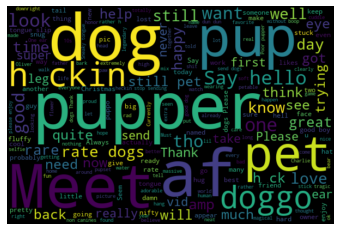

In [99]:
# Creating a wordcloud of the most popular words used by WeRateDogs in their tweets
allwords = ' '.join([twts for twts in twitter_archive_master['text']])
wordCloud = WordCloud(width = 600, height=400, random_state = 21, max_font_size =119).generate(allwords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()